In [1]:
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime

In [2]:
df_accidents= pd.read_csv('Aviones.csv')

In [3]:
df_accidents.shape

(5008, 18)

In [4]:
df_accidents.sample(3)

,Id,Fecha,Hora Declarada,Ruta,Operador,Numero_Vuelo,Trayecto,Modelo_Avion,Registro,Numero Linea,Total a Bordo,Pasajeros a Bordo,Tripulantes a Bordo,Total Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidas en Tierra,Resumen Incidente
486,486,1937-12-05,NaN,"Brindisi, Italy",Imperial Airways,NaN,NaN,Short S-23 (flying boat),G-ADUZ,S-817,8.0,4.0,4.0,2.0,1.0,1.0,0.0,Stalled during takeoff and crashed into the se...
1120,1120,1949-07-12,03:50Z,"Near Bombay, India",KLM Royal Dutch Airlines,NaN,Delhi - Bombay,Lockheed L-749-79-33 Constellation,PH-TDF,2558,45.0,34.0,11.0,45.0,34.0,11.0,0.0,While circling in a blinding monsoon rainstorm...
3284,3284,1984-07-21,1340,"Tau Island, American Samoa",South Pacific Island Airways,NaN,Pango Pango - Tau Island,de Havilland Canada DHC-6 Twin Otter 300,N43SP,669,14.0,11.0,3.0,1.0,1.0,0.0,0.0,While turning from its base leg onto the final...


#### Se tiene informacion desde el 17 de septiembre de 1908 hasta el 06 de julio de 2021

In [5]:
fecha_inicial = df_accidents['Fecha'].min()
fecha_final = df_accidents['Fecha'].max()

print("Fecha inicial de la informacion:", fecha_inicial)
print("Fecha final de la informacion:", fecha_final)

Fecha inicial de la informacion: 1908-09-17
Fecha final de la informacion: 2021-07-06


In [6]:
df_accidents['Fecha'] = df_accidents['Fecha'].astype('datetime64[ns]')

In [7]:
df_accidents[['Total a Bordo', 'Pasajeros a Bordo', 'Tripulantes a Bordo', 'Total Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida', 'Fallecidas en Tierra']] = df_accidents[['Total a Bordo', 'Pasajeros a Bordo', 'Tripulantes a Bordo', 'Total Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida', 'Fallecidas en Tierra']].apply(pd.to_numeric, errors='coerce').fillna(pd.NA).round().astype(pd.Int64Dtype())

#### Total de fallecidos históricamente

In [8]:
total_fatalities = df_accidents['Total Fallecidos'].sum()
print("\033[1;32mTotal de fallecidos históricamente:", total_fatalities, "\033[0m")

Total de fallecidos históricamente: 111470 


#### Total de sobrevivientes históricamente

In [9]:
total_sobrevivientes = (df_accidents['Total a Bordo'] - df_accidents['Total Fallecidos']).sum()
print("Total de sobrevivientes: \033[32m{}\033[0m".format(total_sobrevivientes))

Total de sobrevivientes: 43929


#### Graficas Analisis Univariado

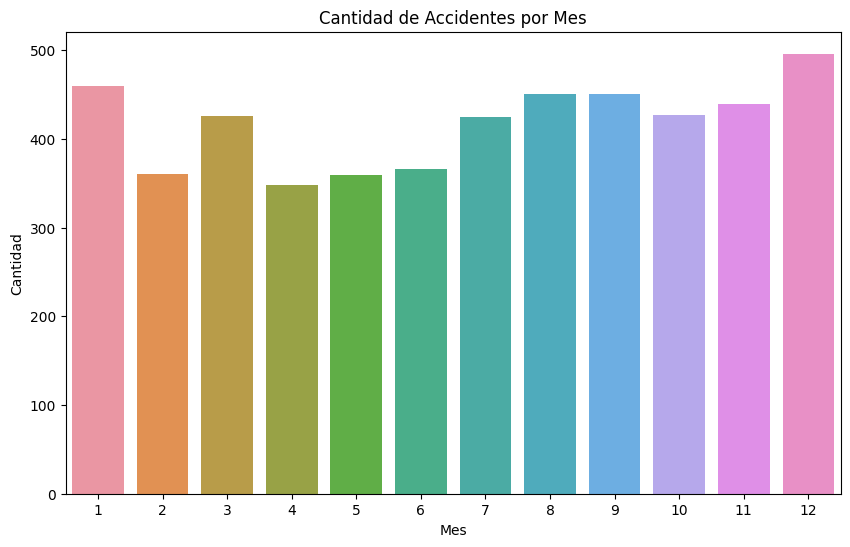

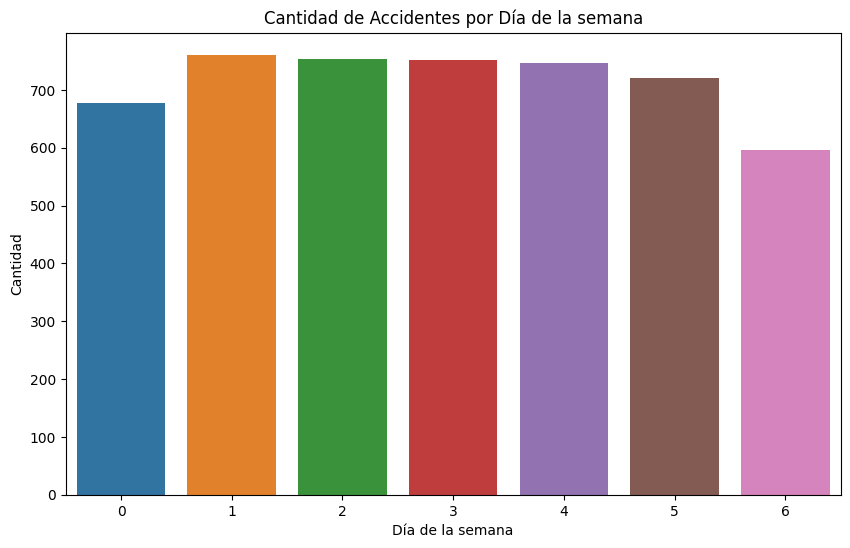

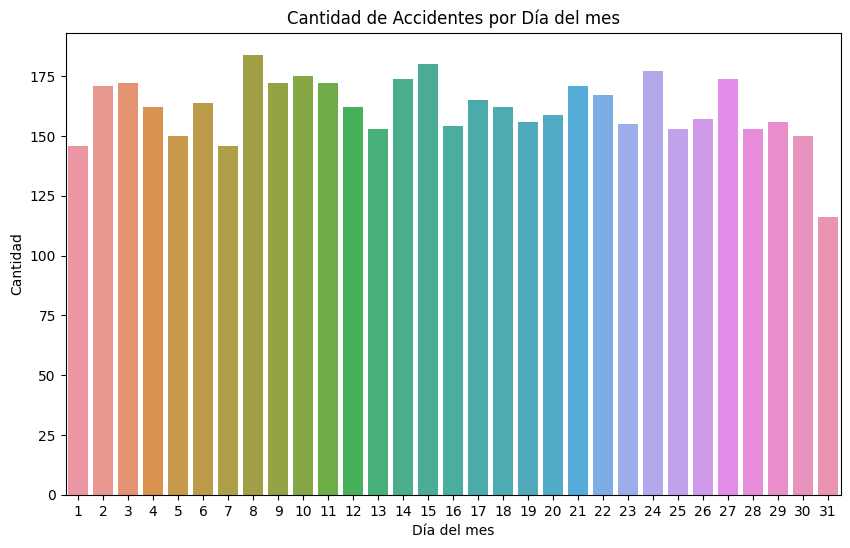

In [10]:
# Graficamos accidentes por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x=df_accidents['Fecha'].dt.month)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de Accidentes por Mes')
plt.show()

# Graficamos accidentes por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x=df_accidents['Fecha'].dt.weekday)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')
plt.title('Cantidad de Accidentes por Día de la semana')
plt.show()

# Graficamos accidentes por día del mes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x=df_accidents['Fecha'].dt.day)
plt.xlabel('Día del mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de Accidentes por Día del mes')
plt.show()


#### Total de accidentes por año, vemos que los ultimos 6 anios la tasa de accidentes disminuyo considerablete, seria revisar el procedimiento que se utilizo, aunque la epoca de Covid-19 donde se suspendieron vuelos en todo el mundo, lo que ayudo a mejorar la estadistica.

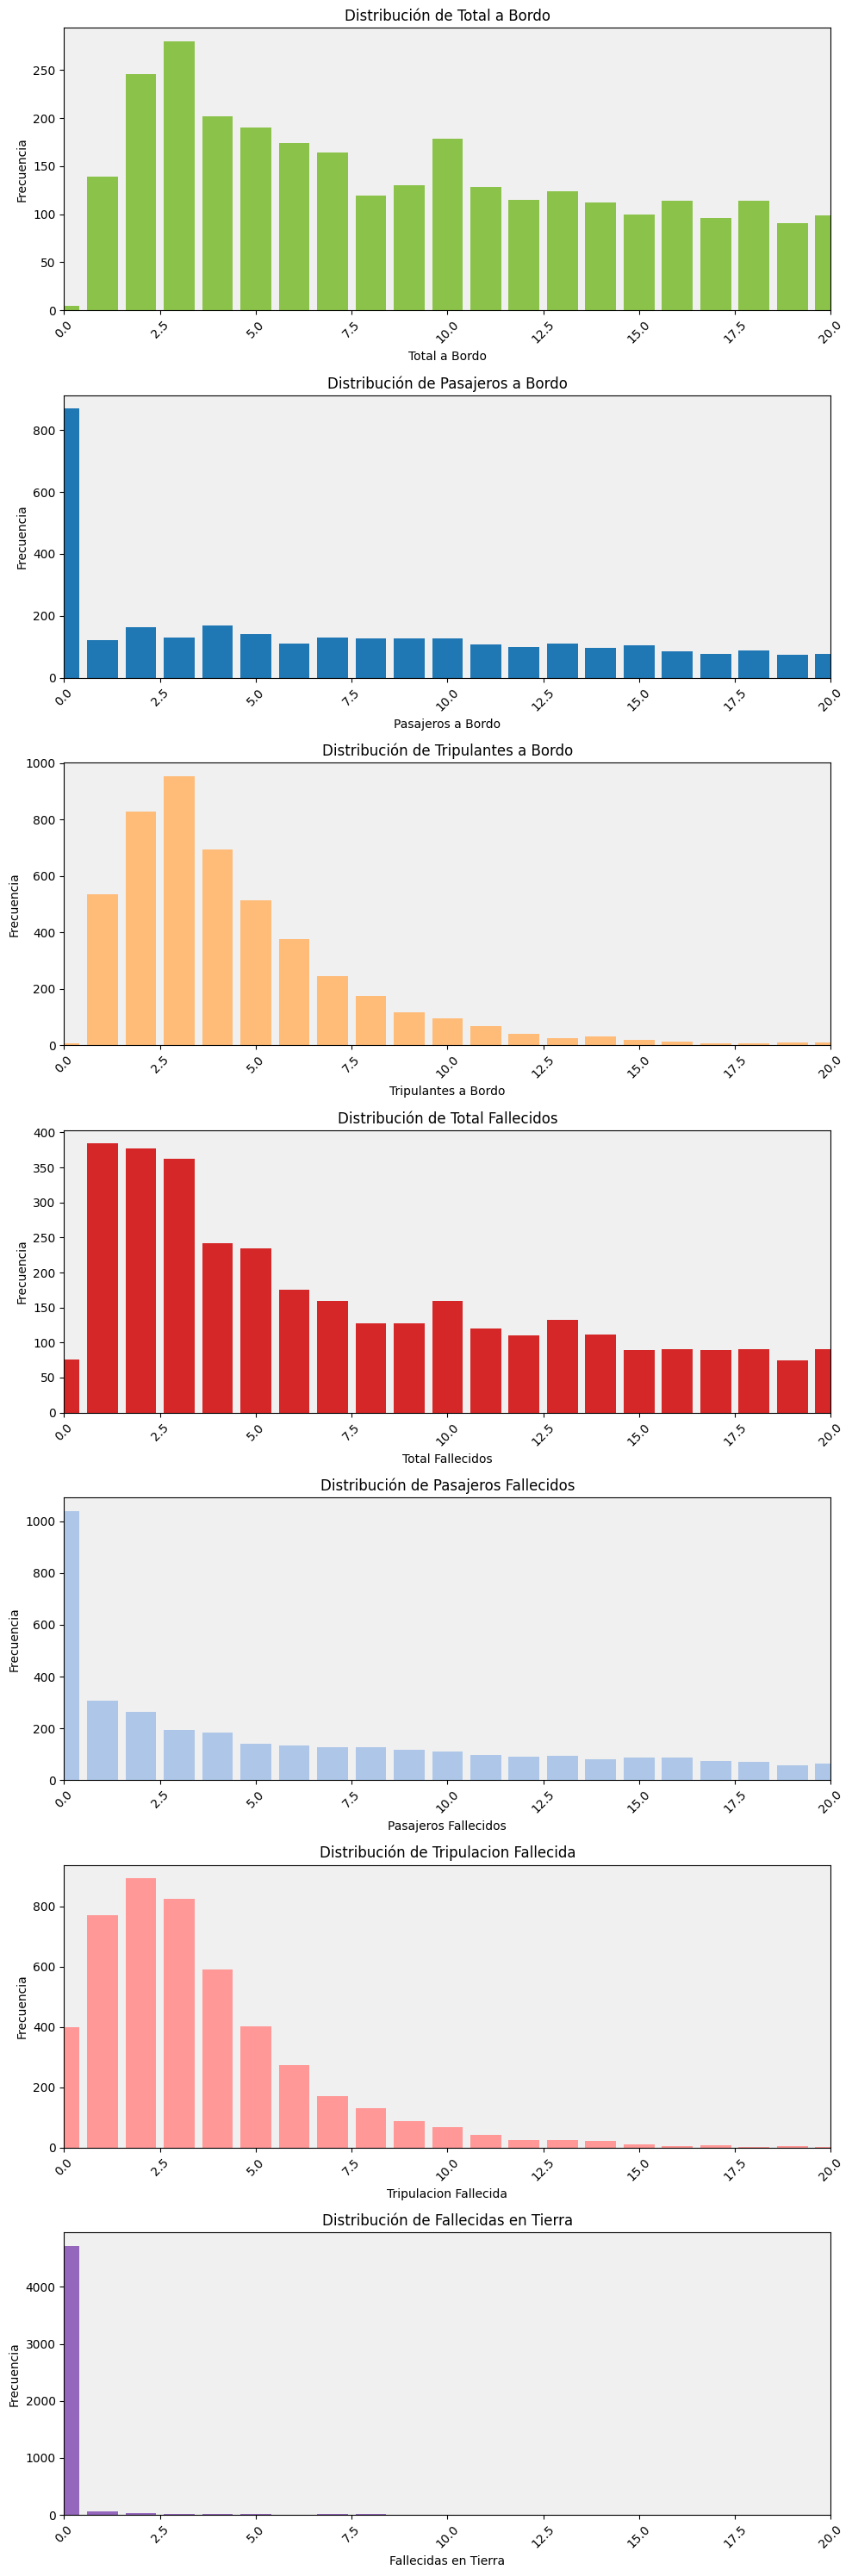

In [11]:
# Definimos las columnas de interés
columns = ['Total a Bordo', 'Pasajeros a Bordo', 'Tripulantes a Bordo', 'Total Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida', 'Fallecidas en Tierra']

# Colores para cada columna
colors = ['#8bc34a', '#1f77b4', '#ffbb78', '#d62728', '#aec7e8', '#ff9896', '#9467bd']

# Creamos gráfico de barras para cada columna
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 30))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns):
    ax = axs[i]
    value_counts = df_accidents[column].value_counts().sort_index()
    ax.bar(value_counts.index, value_counts.values, color=colors[i])
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {column}')
    
    # Establecer otro color de fondo
    ax.set_facecolor('#f0f0f0')
    
    ax.tick_params(axis='x', rotation=45) 
    
    # Establecer límites en el eje x
    ax.set_xlim(0, 20)

plt.tight_layout()
plt.show()

#### Observamos un outliers en el campo Fallecidas en Tierra, con un valor alto como se observo en las estadistica de cada variable, 2750, esto podria ser por los acidentes de los aviones que fueron secuestrados en EE.UU, ataques del 11 de septiembre de 2001

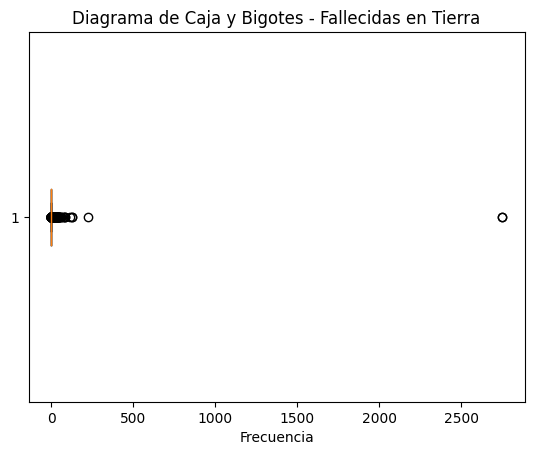

In [12]:
import matplotlib.pyplot as plt

# Obtenemos los datos de la variable "Fallecidas en Tierra"
data = df_accidents['Fallecidas en Tierra'].dropna()

# Creamos el diagrama de caja y bigotes
plt.boxplot(data, vert=False)

# Título y etiquetas de los ejes
plt.title('Diagrama de Caja y Bigotes - Fallecidas en Tierra')
plt.xlabel('Frecuencia')

plt.show()


#### Total de accidentes por año

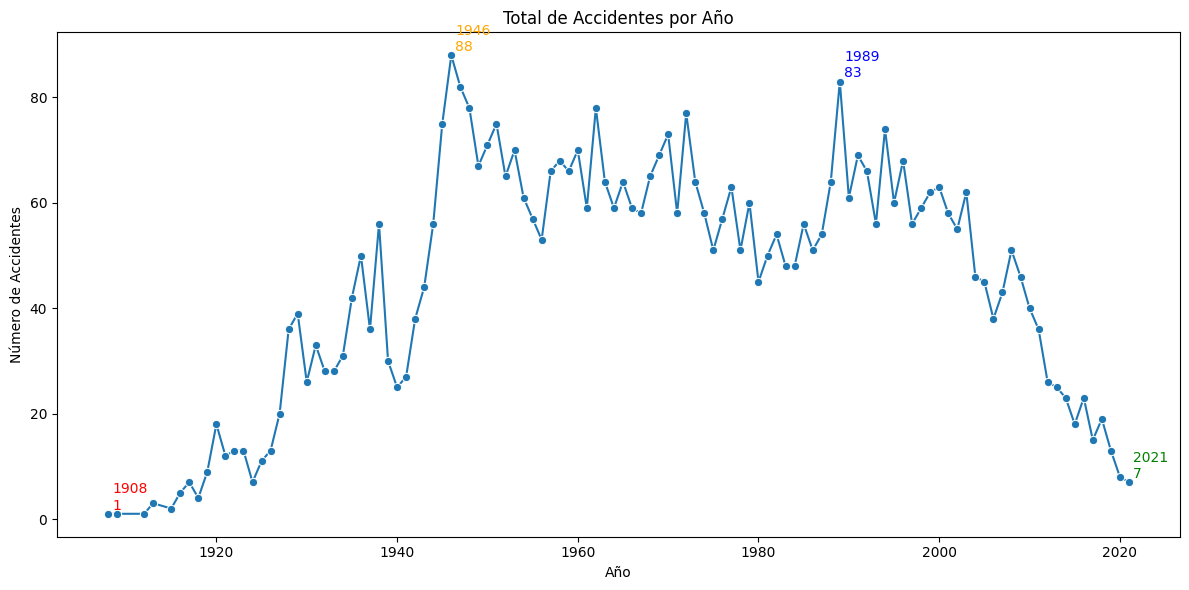

In [14]:
# Calculamos la cantidad de accidentes por año
accidentes_por_anio = df_accidents['Fecha'].dt.year.value_counts().sort_index()

# Creamos el gráfico de línea utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_anio.index, y=accidentes_por_anio.values, marker='o')

# Establecemos los títulos y etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Total de Accidentes por Año')

# Obtener los índices de los puntos de inicio, fin y picos
indices = [0, len(accidentes_por_anio)-1] + list(accidentes_por_anio.values.argsort()[-2:])

# Definir colores para las etiquetas de los años
colors = ['red', 'green', 'blue', 'orange']

# Agregar las etiquetas de año y cantidad en los puntos seleccionados con colores diferentes
for i, index in enumerate(indices):
    x = accidentes_por_anio.index[index]
    y = accidentes_por_anio.values[index]
    color = colors[i % len(colors)]  # Ciclar entre los colores definidos
    plt.annotate(f'{x}\n{y}', xy=(x, y), xytext=(3, 3), textcoords='offset points', color=color)

plt.tight_layout()
plt.show()

In [15]:
# Filtramos los accidentes del año 2021
accidents_2021 = df_accidents[df_accidents['Fecha'].dt.year == 2021]

# Ver accidentes del año 2021
print(accidents_2021)

        Id      Fecha Hora Declarada                        Ruta   
5001  5001 2021-01-09           1440     Near Jakarta, Indonesia  \
5002  5002 2021-03-02           1705                Pieri, Sudan   
5003  5003 2021-03-28           1835          Near Butte, Alaska   
5004  5004 2021-05-21           1800        Near Kaduna, Nigeria   
5005  5005 2021-06-10           0800  Near Pyin Oo Lwin, Myanmar   
5006  5006 2021-07-04          11:30  Patikul, Sulu, Philippines   
5007  5007 2021-07-06           1500              Palana, Russia   

                             Operador Numero_Vuelo   
5001                    Sriwijaya Air        SJ182  \
5002     South Sudan Supreme Airlines          NaN   
5003                Soloy Helicopters          NaN   
5004    Military - Nigerian Air Force          NaN   
5005     Military - Myanmar Air Force          NaN   
5006  Military - Philippine Air Force          NaN   
5007    Kamchatka Aviation Enterprise          251   

                      

#### Total de accidentes por operador, se observa que Aeroflot es el que tiene mas accidentes, por lo que ya identificado se puede implementar un plan de auditoria para mitigar los accidientes

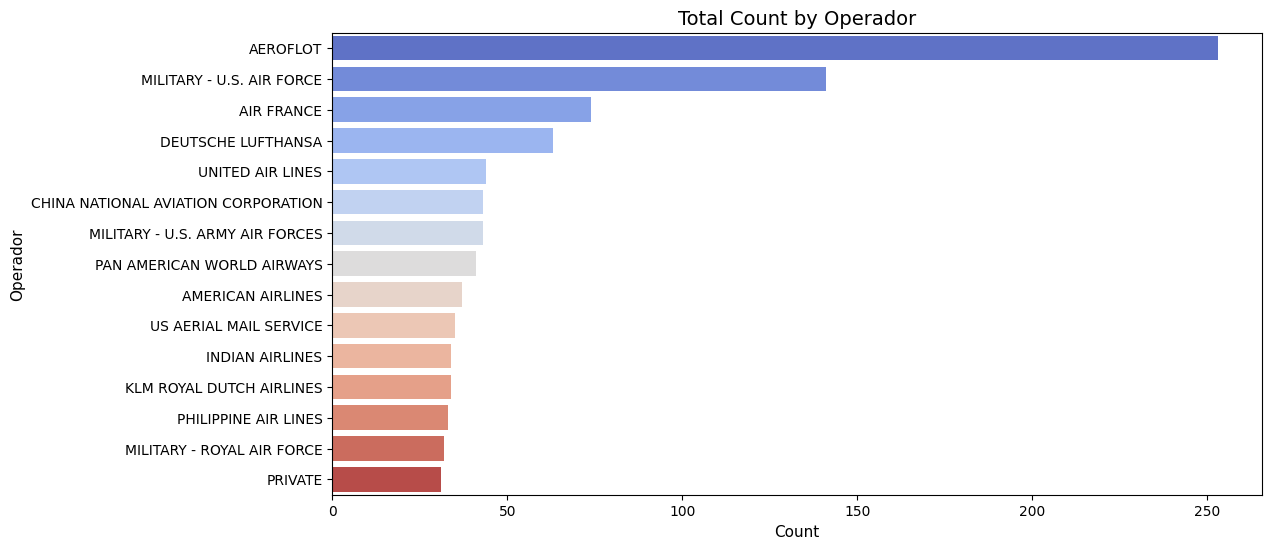

In [16]:
df_accidents['Operador'] = df_accidents['Operador'].str.upper()
df_accidents['Operador'] = df_accidents['Operador'].replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = df_accidents.groupby('Operador')[['Operador']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operador": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op, palette="coolwarm", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operador', fontsize=11)
plt.title('Total Count by Operador', loc='Center', fontsize=14)
plt.show()

#### Hay una alta correlacion de Total a Bordo con Pasajeros a Bordo, siginifica que se podria borrar una de las 2 columnas para segmentar nuestro analisis de los datos, tambien 2 variables muy correlacionadas son Total de Fallecidos y Pasajeros Fallecidos y hay una columna que no esta correlacionada con ninugun variables como Fallecidas en Tierra.

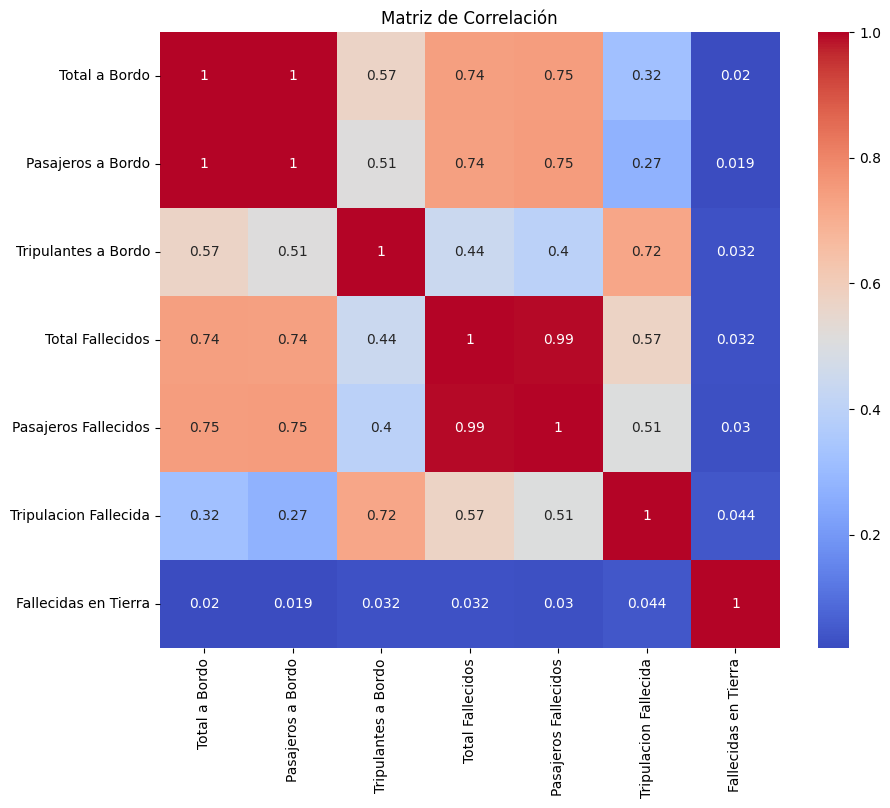

In [17]:
# Variables numéricas de interés
numeric_variables = ['Total a Bordo', 'Pasajeros a Bordo', 'Tripulantes a Bordo', 'Total Fallecidos', 'Pasajeros Fallecidos', 'Tripulacion Fallecida', 'Fallecidas en Tierra']

# Filtrar el DataFrame para las variables numéricas
numeric_df = df_accidents[numeric_variables]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Nubes de palabras mas frecuentes en los accidentes (se estrelló, toma, tripulación, vuelo, despegue, piloto, aeropuerto, aproximación, fallo, tierra, accidente, muertos, pista)

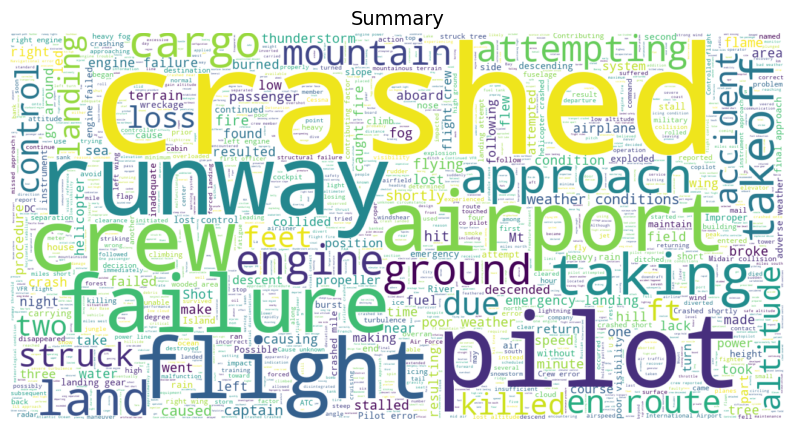

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Convertimos los valores float a str en los resúmenes de incidentes
text = ' '.join(str(summary) for summary in df_accidents['Resumen Incidente'].tolist())
plane_mask = np.array(Image.open('airplane.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Summary', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

#### Total de accidentes por fecha, aqui podemos observar el mas reciente, accidente del 2001-09-11, atentados del 11 de septiembre en los EE.UU

In [19]:
Total_Accidentes = df_accidents['Fecha'].value_counts()
Total_Accidentes.head(5)

Fecha
1988-08-31    4
2001-09-11    4
1945-02-23    3
1946-12-28    3
1992-08-27    3
Name: count, dtype: int64

In [20]:
# Filtramos esa fecha y observamos que todos esos accidentes fueron en EE.UU
mask = df_accidents[df_accidents['Fecha'] == '2001-09-11']
mask

,Id,Fecha,Hora Declarada,Ruta,Operador,Numero_Vuelo,Trayecto,Modelo_Avion,Registro,Numero Linea,Total a Bordo,Pasajeros a Bordo,Tripulantes a Bordo,Total Fallecidos,Pasajeros Fallecidos,Tripulacion Fallecida,Fallecidas en Tierra,Resumen Incidente
4345,4345,2001-09-11,0945,"Arlington, Virginia.",AMERICAN AIRLINES,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,64,58,6,64,58,6,125,The aircraft was hijacked after taking off fro...
4346,4346,2001-09-11,0847,"New York City, New York",AMERICAN AIRLINES,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92,81,11,92,81,11,2750,The aircraft was hijacked shortly after it lef...
4347,4347,2001-09-11,0903,"New York City, New York",UNITED AIR LINES,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65,56,9,65,56,9,2750,The aircraft was hijacked shortly after it lef...
4348,4348,2001-09-11,1003,"Shanksville, Pennsylvania",UNITED AIR LINES,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,44,37,7,44,37,7,0,The aircraft was hijacked after taking off fro...


#### Podemos visualizar las coordenadas de esos accidentes ocurridos en EE.UU, concuerda con los atentados a las torres gemelas del 11 de septiembre de 2001

In [22]:
import folium
from geopy.geocoders import Nominatim

mask = df_accidents[df_accidents['Fecha'] == '2001-09-11']

geo = Nominatim(user_agent='coord', timeout=2)
lugares = list(mask['Ruta'])

# Creamos el mapa de acuerdo a las coordenadas promedio
avg_lat = 0
avg_lon = 0
count = 0

# Obtenemos las coordenadas de cada lugar y actualizar el centro del mapa
coordinates = []
for lugar in lugares:
    location = geo.geocode(lugar)
    if location is not None:
        coordinates.append((location.latitude, location.longitude))
        avg_lat += location.latitude
        avg_lon += location.longitude
        count += 1

if count > 0:
    avg_lat /= count
    avg_lon /= count

mapa = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)

# Agregamos marcadores para cada lugar
for coord in coordinates:
    folium.Marker(coord).add_to(mapa)

# Mostramos el mapa
mapa

#### Nos muestra un resumen de los incidentes que causaron los accidentes en diferentes aeropuertos de Estados Unidos

In [23]:
lista = mask['Resumen Incidente'].tolist()
lista

['The aircraft was hijacked after taking off from Dulles International Airport. The hijackers took control of the aircraft and deliberately crashed it into the Pentagon. It was one of four planes that were hijacked the same day.',
 'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.',
 'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the south tower of the World Trade Center between the 78th and 84th floors at approximately 550 mph. After 56 minutes, the building collapsed. It was one of four planes that were hijacked the same day.',
 'The aircraft was hijacked a

#### Analisis Bivariado

#### Accidentes mas frecuentes por operadores, vemos a Aeroflot(Rusia) con un porcentaje del 32.7%

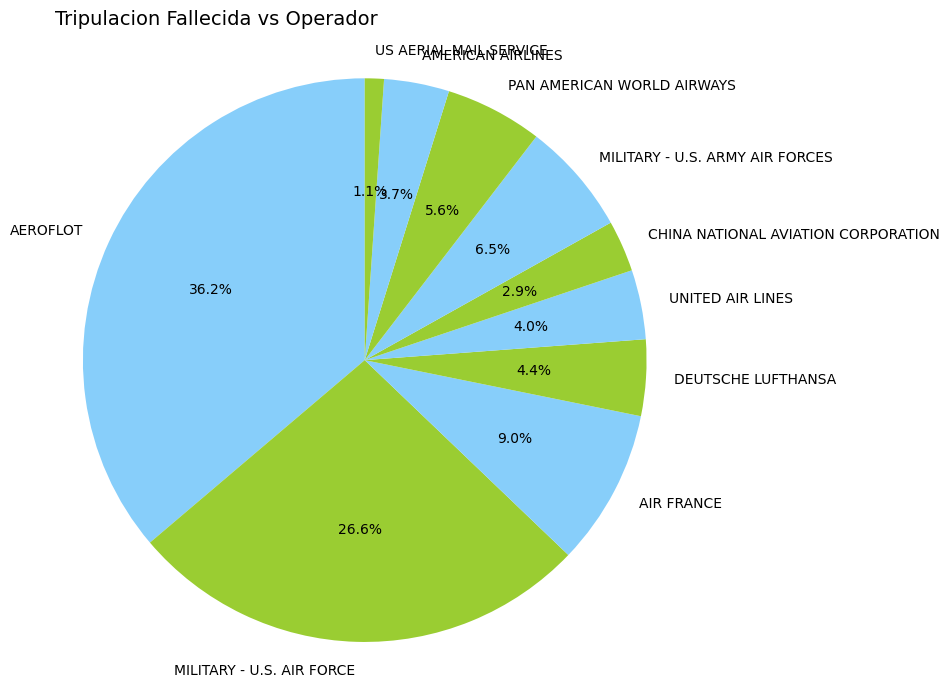

In [24]:
# Cantidad de accidentes por operador
operator_counts = df_accidents['Operador'].value_counts()

# Limitamos la cantidad de operadores mostrados en el gráfico de pastel
top_operators = operator_counts.head(10)  # Cambia el número 10 por la cantidad deseada

# Obtenemos los datos de Pasajeros Fallecidos por Operador
passenger_fatalities = df_accidents.groupby('Operador')['Tripulacion Fallecida'].sum().loc[top_operators.index]

# Graficamos Tripulacion Fallecida vs Operador en un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(passenger_fatalities, labels=top_operators.index, autopct='%1.1f%%', colors=['lightskyblue', 'yellowgreen'], startangle=90)
plt.title('Tripulacion Fallecida vs Operador', fontsize=14, loc='left', pad=20)
plt.axis('equal')

plt.show()

In [25]:
df_accidents['Operador'].value_counts().head(10)

Operador
AEROFLOT                               253
MILITARY - U.S. AIR FORCE              141
AIR FRANCE                              74
DEUTSCHE LUFTHANSA                      63
UNITED AIR LINES                        44
CHINA NATIONAL AVIATION CORPORATION     43
MILITARY - U.S. ARMY AIR FORCES         43
PAN AMERICAN WORLD AIRWAYS              41
AMERICAN AIRLINES                       37
US AERIAL MAIL SERVICE                  35
Name: count, dtype: int64

#### Modelos de avion com mas accidentes, este dato es muy importante porque encontrada esta informacion, se debe programar auditorias a las operadoras de aviacion (Aqui se podria revisar las principales causas de los accidentes, fechas de mantenimiento, calidad de repuestos, etc. El avion Douglas DC-3 tiene un 40.81% de accidentes, con este datos ya deberia estar fuera de circulacion)

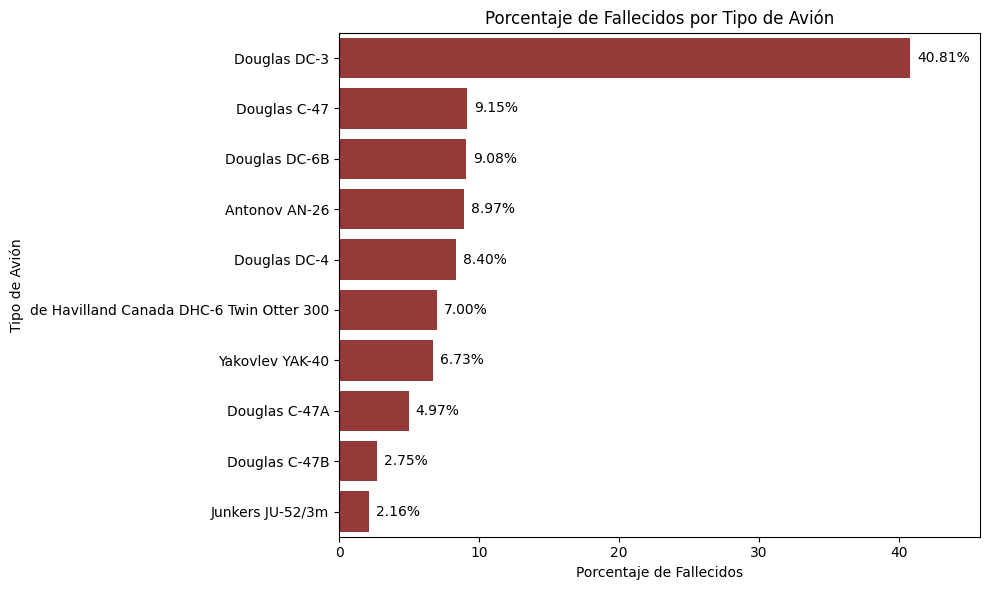

In [26]:
# Filtramos el DataFrame para los tipos de avión más relevantes
top_aircraft_types = df_accidents['Modelo_Avion'].value_counts().nlargest(10).index
filtered_df = df_accidents[df_accidents['Modelo_Avion'].isin(top_aircraft_types)]

# Calculamos el porcentaje de fallecidos por tipo de avión
death_percentage_by_type = (filtered_df.groupby('Modelo_Avion')['Total Fallecidos'].sum() / filtered_df['Total Fallecidos'].sum()) * 100

# Ordenamos los resultados de mayor a menor
death_percentage_by_type = death_percentage_by_type.sort_values(ascending=False)

# Creamos el gráfico de barras acostadas
plt.figure(figsize=(10, 6))
sns.barplot(x=death_percentage_by_type.values, y=death_percentage_by_type.index, color='brown')

plt.xlabel('Porcentaje de Fallecidos')
plt.ylabel('Tipo de Avión')
plt.title('Porcentaje de Fallecidos por Tipo de Avión')

# Agregamos el porcentaje en cada barra
for i, v in enumerate(death_percentage_by_type.values):
    plt.text(v + 0.5, i, f'{v:.2f}%', color='black', ha='left', va='center')

plt.xlim(0, max(death_percentage_by_type.values) + 5)

plt.tight_layout()
plt.show()

#### Tasa de Mortalidad en los accidentes aereos y reducion en un 5% en la tasa de mortalidad a nivel anual, las lineas rojas muestran esa reduccion por año, pero esa reduccion solo se logra con la implementacio de planes de mitigacion, auditoria a todos los operadores comerciales y no comerciales  

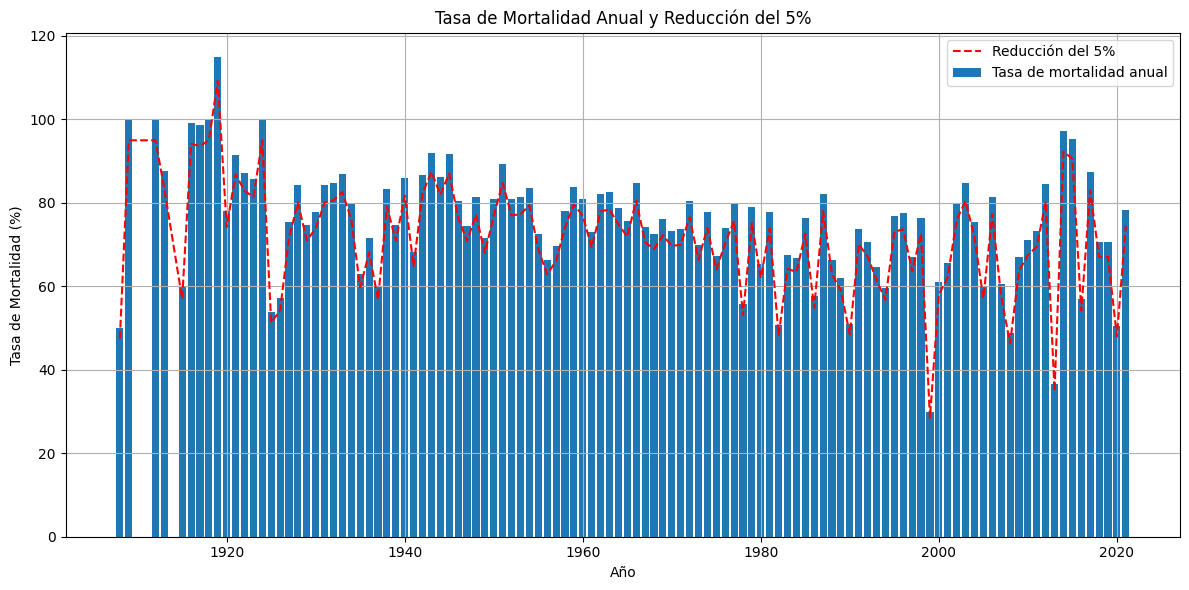

In [27]:
# Calculamos la tasa de mortalidad anual
total_fallecidos_anual = df_accidents.groupby(df_accidents['Fecha'].dt.year)['Total Fallecidos'].sum()
total_personas_bordo_anual = df_accidents.groupby(df_accidents['Fecha'].dt.year)['Total a Bordo'].sum()
tasa_mortalidad_anual = (total_fallecidos_anual / total_personas_bordo_anual) * 100

# Aplicamos reducción del 5% a la tasa de mortalidad anual
tasa_mortalidad_reducida = tasa_mortalidad_anual - (tasa_mortalidad_anual * 0.05)

# Graficamos la tasa de mortalidad anual y la reducción del 5%
plt.figure(figsize=(12, 6))
plt.bar(tasa_mortalidad_anual.index, tasa_mortalidad_anual.values, label='Tasa de mortalidad anual')
plt.plot(tasa_mortalidad_anual.index, tasa_mortalidad_reducida, 'r--', label='Reducción del 5%')
plt.xlabel('Año')
plt.ylabel('Tasa de Mortalidad (%)')
plt.title('Tasa de Mortalidad Anual y Reducción del 5%')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [28]:
# Calculamos la tasa de mortalidad anual
total_fallecidos_anual = df_accidents.groupby(df_accidents['Fecha'].dt.year)['Total Fallecidos'].sum()
total_personas_bordo_anual = df_accidents.groupby(df_accidents['Fecha'].dt.year)['Total a Bordo'].sum()
tasa_mortalidad_anual = (total_fallecidos_anual / total_personas_bordo_anual) * 100

# Aplicamos reducción del 5% a la tasa de mortalidad anual
tasa_mortalidad_reducida = tasa_mortalidad_anual - (tasa_mortalidad_anual * 0.05)

#  Ver resultados
print("Tasa de mortalidad anual:")
print(tasa_mortalidad_anual)
print("\nTasa de mortalidad reducida (5% de reducción):")
print(tasa_mortalidad_reducida)


Tasa de mortalidad anual:
Fecha
1908         50.0
1909        100.0
1912        100.0
1913    87.755102
1915         60.0
          ...    
2017    87.346939
2018    70.540759
2019    70.601852
2020    50.497866
2021    78.414097
Length: 111, dtype: Float64

Tasa de mortalidad reducida (5% de reducción):
Fecha
1908         47.5
1909         95.0
1912         95.0
1913    83.367347
1915         57.0
          ...    
2017    82.979592
2018    67.013721
2019    67.071759
2020    47.972973
2021    74.493392
Length: 111, dtype: Float64


#### Total de muertes por ruta

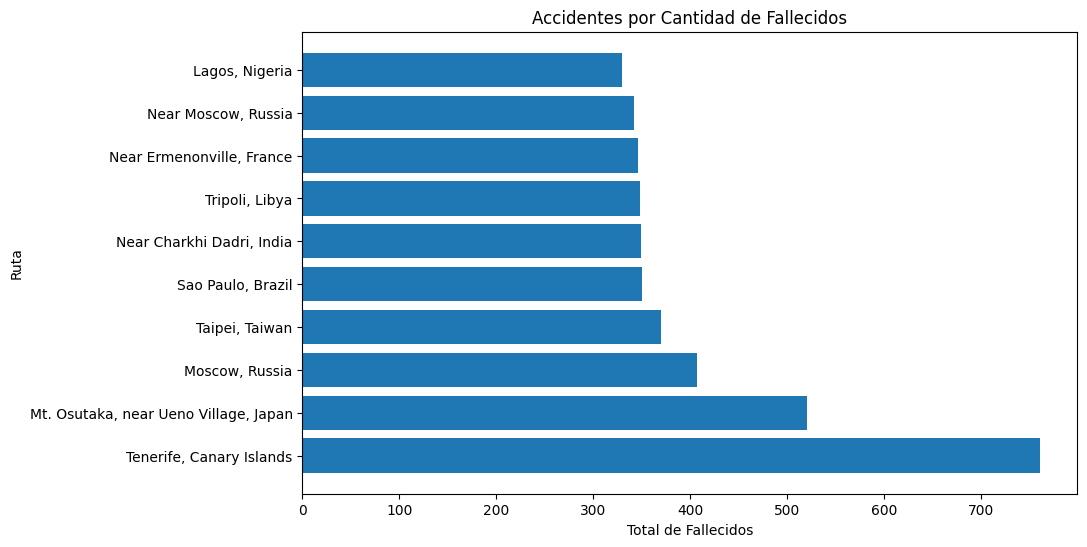

In [29]:
fatalities_by_location = df_accidents.groupby('Ruta')['Total Fallecidos'].sum()

# Ordenar los resultados de mayor a menor
fatalities_by_location = fatalities_by_location.sort_values(ascending=False)

# Seleccionar los 10 mayores accidentes
top_10_fatalities_by_location = fatalities_by_location.head(10)

# Crear el gráfico de barras acostado
plt.figure(figsize=(10, 6))
plt.barh(top_10_fatalities_by_location.index, top_10_fatalities_by_location.values)
plt.xlabel('Total de Fallecidos')
plt.ylabel('Ruta')
plt.title('Accidentes por Cantidad de Fallecidos')
plt.show()


In [30]:
fatalities_by_location = df_accidents.groupby('Ruta')['Total Fallecidos'].sum()
top_10_fatalities = fatalities_by_location.sort_values(ascending=False).head(10)
print(top_10_fatalities)


Ruta
Tenerife, Canary Islands                 761
Mt. Osutaka, near Ueno Village, Japan    520
Moscow, Russia                           407
Taipei, Taiwan                           370
Sao Paulo, Brazil                        350
Near Charkhi Dadri, India                349
Tripoli, Libya                           348
Near Ermenonville, France                346
Near Moscow, Russia                      342
Lagos, Nigeria                           329
Name: Total Fallecidos, dtype: Int64


#### Porcentaje promedio de fallecidos en relación con el total de personas a bordo de los accidentes.

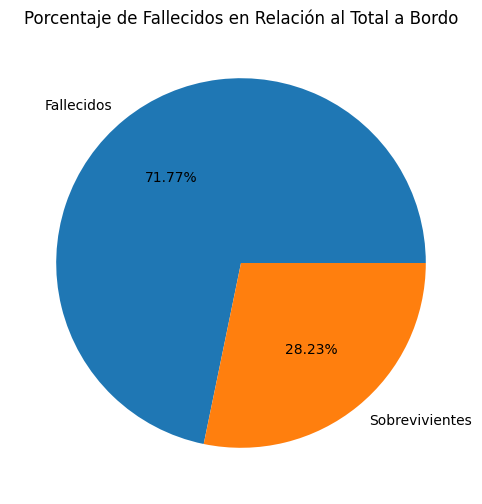

In [31]:
average_death_percentage = df_accidents['Total Fallecidos'].sum() / df_accidents['Total a Bordo'].sum() * 100

# Creamos el gráfico
plt.figure(figsize=(6, 6))
plt.pie([average_death_percentage, 100-average_death_percentage], labels=['Fallecidos', 'Sobrevivientes'], autopct='%.2f%%')
plt.title('Porcentaje de Fallecidos en Relación al Total a Bordo')
plt.show()


In [32]:
average_death_percentage = df_accidents['Total Fallecidos'].sum() / df_accidents['Total a Bordo'].sum() * 100
print(f"Average death percentage: {average_death_percentage:.2f}%")

Average death percentage: 71.77%


#### Promedio de muertes:

In [33]:
average_fatalities = df_accidents['Total Fallecidos'].mean()
average_fatalities

22.294

#### Suma de pasajeros a bordo

In [34]:
total_passengers_aboard = df_accidents['Total a Bordo'].sum()
total_passengers_aboard

155326

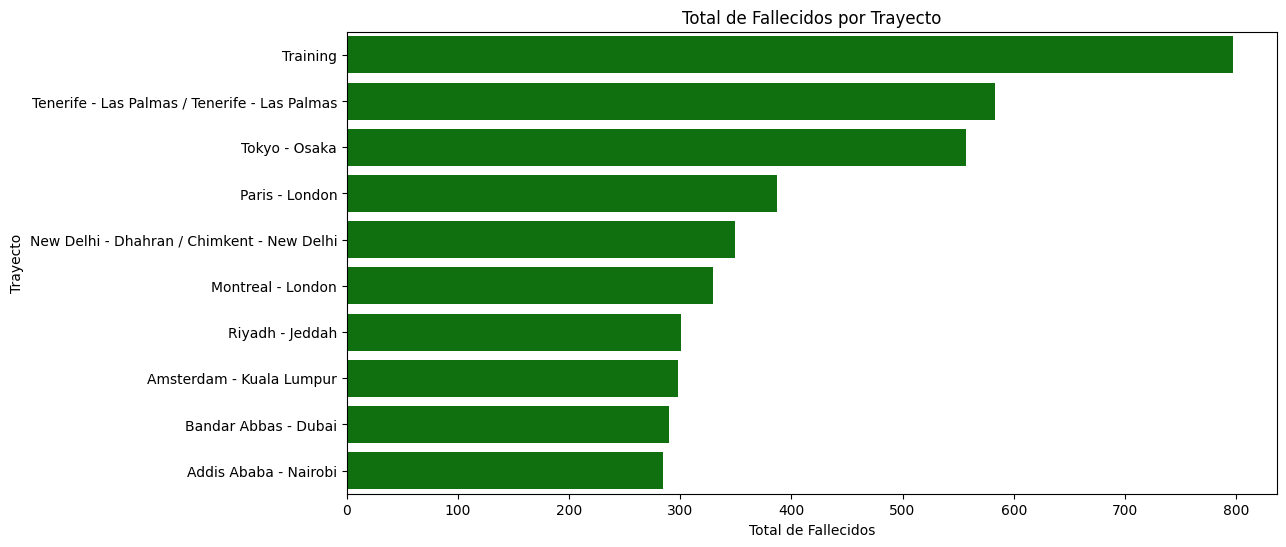

In [35]:
fatalities_by_trayecto = df_accidents.groupby('Trayecto')['Total Fallecidos'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=fatalities_by_trayecto.values, y=fatalities_by_trayecto.index, color='green')
plt.xlabel('Total de Fallecidos')
plt.ylabel('Trayecto')
plt.title('Total de Fallecidos por Trayecto')
plt.show()

#### Tasa de supervivencia en los accidentes calculada a partir de Total de personas a bordo y total de fallecidas

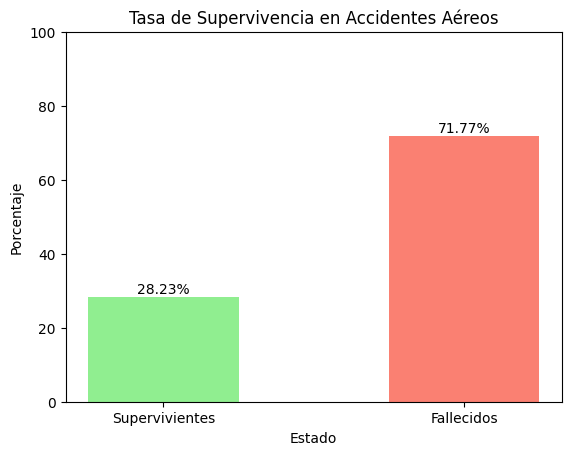

In [36]:
# Total de personas a bordo en el accidente
total_a_bordo = df_accidents['Total a Bordo'].sum()

# Total de personas fallecidas en el accidente
total_fallecidos = df_accidents['Total Fallecidos'].sum()

# Cálculamos la tasa de supervivencia
tasa_supervivencia = (total_a_bordo - total_fallecidos) / total_a_bordo * 100

# Estilo de las barras
bar_width = 0.5
bar_color_supervivientes = 'lightgreen'
bar_color_fallecidos = 'salmon'

# Gráfico de barras
plt.bar(['Supervivientes'], [tasa_supervivencia], width=bar_width, color=bar_color_supervivientes)
plt.bar(['Fallecidos'], [100 - tasa_supervivencia], width=bar_width, color=bar_color_fallecidos)

# Etiquetas y título del gráfico
plt.xlabel('Estado')
plt.ylabel('Porcentaje')
plt.title('Tasa de Supervivencia en Accidentes Aéreos')

# Añadimos el porcentaje encima de cada barra
plt.text(0, tasa_supervivencia + 1, f'{tasa_supervivencia:.2f}%', color='black', ha='center')
plt.text(1, 100 - tasa_supervivencia + 1, f'{100 - tasa_supervivencia:.2f}%', color='black', ha='center')

# Configurar límites del eje y
plt.ylim(0, 100)

# Ver gráfico
plt.show()


In [37]:
# Número total de personas a bordo en el accidente
total_a_bordo = df_accidents['Total a Bordo'].sum()

# Número total de personas fallecidas en el accidente
total_fallecidos = df_accidents['Total Fallecidos'].sum()

# Cálculo de la tasa de supervivencia
tasa_supervivencia = (total_a_bordo - total_fallecidos) / total_a_bordo * 100

# Imprimir la tasa de supervivencia
print(f"Tasa de supervivencia: {tasa_supervivencia:.2f}%")


Tasa de supervivencia: 28.23%


#### Resumen de los accidentes, aqui podriamos evaluar estos casos (Se estrelló al intentar aterrizar, accidente durante el despegue y se estrelló al despegar) y revisar variables como mantenimiento del avion, tipo de operador, capacitacion del piloto, etc

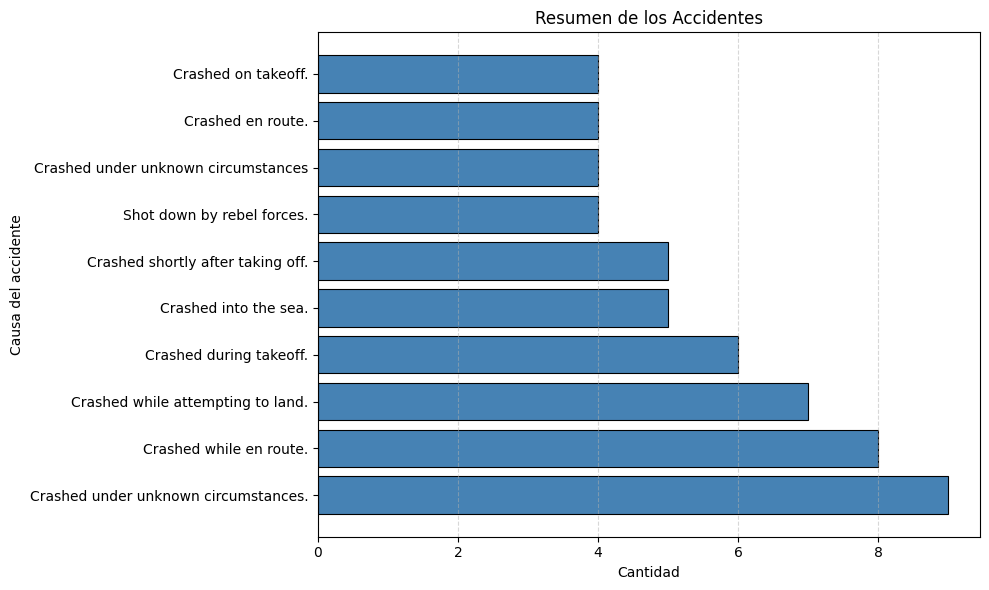

In [38]:
# Obtenemos las 10 causas más frecuentes
top_10_causas = df_accidents['Resumen Incidente'].value_counts().head(10)

# Estilo de las barras
color = 'steelblue'  # Color de las barras
edgecolor = 'black'  # Color del borde de las barras
linewidth = 0.8  # Grosor del borde de las barras

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_causas.index, top_10_causas.values, color=color, edgecolor=edgecolor, linewidth=linewidth)
plt.xlabel('Cantidad')
plt.ylabel('Causa del accidente')
plt.title('Resumen de los Accidentes')

# Aspectos visuales
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de referencia en el eje x
plt.tight_layout()  # Ajustar el espaciado de los elementos del gráfico

plt.show()


In [39]:
# Obtenemos las 10 causas más frecuentes
top_10_causas = df_accidents['Resumen Incidente'].value_counts().head(10)

# Ver la 10 causas más frecuentes
print("Causas de los accidentes:")
print(top_10_causas)

Causas de los accidentes:
Resumen Incidente
Crashed under unknown circumstances.    9
Crashed while en route.                 8
Crashed while attempting to land.       7
Crashed during takeoff.                 6
Crashed into the sea.                   5
Crashed shortly after taking off.       5
Shot down by rebel forces.              4
Crashed under unknown circumstances     4
Crashed en route.                       4
Crashed on takeoff.                     4
Name: count, dtype: int64


#### Porcentaje de accidentes fatales

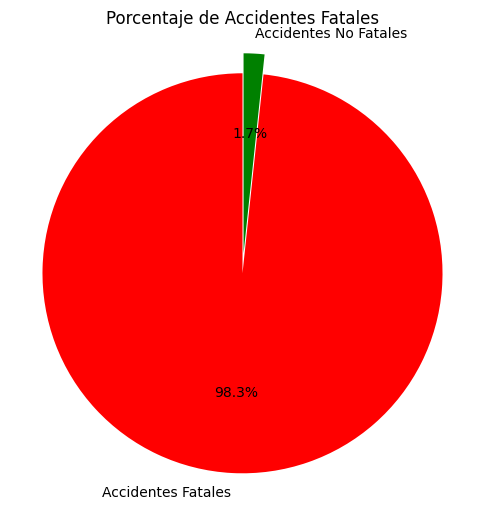

In [40]:
# Filtramos los accidentes fatales
fatal_accidents = df_accidents[df_accidents['Total Fallecidos'] > 0]

# Calculo el porcentaje de accidentes fatales
fatality_percentage = (len(fatal_accidents) / len(df_accidents)) * 100

# Gráfico de torta
labels = ['Accidentes Fatales', 'Accidentes No Fatales']
sizes = [fatality_percentage, 100 - fatality_percentage]
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Accidentes Fatales')

plt.axis('equal')
plt.show()


In [41]:
promedio_total_fallecidos = df_accidents['Total Fallecidos'].mean()
print("Promedio Total Fallecidos:", promedio_total_fallecidos)

Promedio Total Fallecidos: 22.294


In [42]:
total_a_bordo = df_accidents['Total a Bordo'].sum()
total_fallecidos = df_accidents['Total Fallecidos'].sum()
tasa_supervivencia = ((total_a_bordo - total_fallecidos) / total_a_bordo) * 100
tasa_supervivencia

28.23480936868264

In [43]:
tasa_mortalidad_actual = (df_accidents['Total Fallecidos'] / df_accidents['Total a Bordo']) * 100
tasa_mortalidad_reducida = tasa_mortalidad_actual * 0.95
tasa_mortalidad_reducida

0            47.5
1            95.0
2            95.0
3            95.0
4            66.5
          ...    
5003    79.166667
5004         95.0
5005    81.428571
5006    49.479167
5007         95.0
Length: 5008, dtype: Float64

In [44]:
pasajeros_fallecidos = df_accidents['Pasajeros Fallecidos'].sum()
pasajeros_a_bordo = df_accidents['Pasajeros a Bordo'].sum()
proporcion_pasajeros_fallecidos = (pasajeros_fallecidos / pasajeros_a_bordo) * 100
proporcion_pasajeros_fallecidos

70.26472462731809

In [45]:
fallecidas_tierra = df_accidents['Fallecidas en Tierra'].sum()
total_fallecidos = df_accidents['Total Fallecidos'].sum()
proporcion_fallecidos_tierra = (fallecidas_tierra / total_fallecidos) * 100
proporcion_fallecidos_tierra

7.652283125504621

In [46]:
df_accidents.shape

(5008, 18)